In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config Completer.use_jedi = False

C:\Users\gshik\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gshik\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\gshik\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## Importing data

In [2]:
order_data = pd.read_csv('data/machine_learning_challenge_order_data.csv')
label_data=pd.read_csv("data/machine_learning_challenge_labeled_data.csv")

## EDA

In [3]:
## Shape of dataset :

print("\n")
print("----------- Understanding shape of dataset -------------")
print("\n")
print("----------- order_data -------------")
print("\n")
print("Shape of dataset is : {0}".format(order_data.shape))
print("Total rows : {}".format(order_data.shape[0]))
print("Total variables : {}".format(order_data.shape[1]))

print("\n")
print("----------- label_data -------------")
print("\n")

print("Shape of dataset is : {0}".format(label_data.shape))
print("Total rows : {}".format(label_data.shape[0]))
print("Total variables : {}".format(label_data.shape[1]))
print('Customer Return Rate: %f' %(label_data.is_returning_customer.sum()/label_data.is_returning_customer.count()))






----------- Understanding shape of dataset -------------


----------- order_data -------------


Shape of dataset is : (786600, 13)
Total rows : 786600
Total variables : 13


----------- label_data -------------


Shape of dataset is : (245455, 2)
Total rows : 245455
Total variables : 2
Customer Return Rate: 0.226139


In [4]:
## Analyzing feature type:

print("\n")
print("----------- Unique values for each independent variable in order_data -------------")
print("\n")

for x in order_data.columns:
    print("Total unique categories in variable {0} is : {1}".format(x,order_data[x].nunique()))



----------- Unique values for each independent variable in order_data -------------


Total unique categories in variable customer_id is : 245455
Total unique categories in variable order_date is : 776
Total unique categories in variable order_hour is : 24
Total unique categories in variable customer_order_rank is : 369
Total unique categories in variable is_failed is : 2
Total unique categories in variable voucher_amount is : 911
Total unique categories in variable delivery_fee is : 98
Total unique categories in variable amount_paid is : 6471
Total unique categories in variable restaurant_id is : 13569
Total unique categories in variable city_id is : 3749
Total unique categories in variable payment_id is : 5
Total unique categories in variable platform_id is : 14
Total unique categories in variable transmission_id is : 10


1. customer id is the customer level key

2. voucher_amount  delivery_fee  amount_paid are continuos features wherea order_date is date time featue.

3. 'order_hour', 'customer_order_rank', 'is_failed', 'payment_id', 'platform_id', 'transmission_id', 'restaurant_id', 'city_id' are categorical features.

4. Among categorical features we see 'restaurant_id' & 'city_id' are nominal categorical variables with too many categories and thus they cannot be directly used for practical purposes.



----------- Descriptive statistics continous Variables-------------


            index     count       mean       std  min      25%    50%     75%  \
0  voucher_amount  786600.0   0.091489  0.479558  0.0  0.00000  0.000   0.000   
1    delivery_fee  786600.0   0.181180  0.369710  0.0  0.00000  0.000   0.000   
2     amount_paid  786600.0  10.183271  5.618121  0.0  6.64812  9.027  12.213   

         max  
0    93.3989  
1     9.8600  
2  1131.0300  


----------- Checking for outliers in continuos data using box plots and quantile distribution-------------


                0.0100  0.1000   0.2500  0.5000  0.7500   0.9000  0.9900  \
voucher_amount   0.000    0.00  0.00000   0.000   0.000   0.0000   2.058   
delivery_fee     0.000    0.00  0.00000   0.000   0.000   0.7395   1.479   
amount_paid      3.186    5.31  6.64812   9.027  12.213  16.1955  28.674   

                   0.9990     0.9999     1.0000  
voucher_amount   4.109836   9.659019    93.3989  
delivery_fee     2.465000  

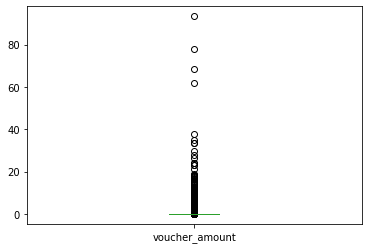

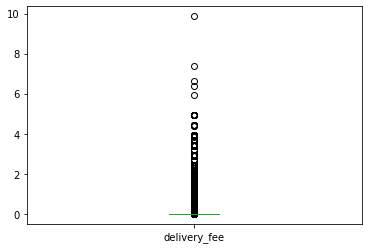

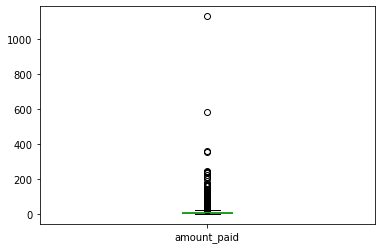

In [5]:
print("\n")
print("----------- Descriptive statistics continous Variables-------------")
print("\n")

desc_Stat = order_data[['voucher_amount','delivery_fee','amount_paid']].describe().T.reset_index()
print(desc_Stat)

print("\n")
print("----------- Checking for outliers in continuos data using box plots and quantile distribution-------------")
print("\n")


i=1
for c in ['voucher_amount','delivery_fee', 'amount_paid']:
    plt.figure(i)
    order_data.boxplot(column =c, grid = False)
    i=i+1


data_outlier = order_data[['voucher_amount','delivery_fee', 'amount_paid']]
print(data_outlier.quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999, 0.9999, 1]).transpose())

print("\n")
print("-----------  capping voucher_amount and amount_paid with 99.99 percentile------------")
print("\n")

order_data['voucher_amount'] = np.where(order_data['voucher_amount']>9.659019, 9.659019, order_data['voucher_amount'])
order_data['amount_paid'] = np.where(order_data['amount_paid']>	94.608297, 94.608297, order_data['amount_paid'])




----------- Descriptive statistics Categorical Variables-------------


              Variable  Total_Records  Unique_values  Top_category  Frequency
0           order_hour       786600.0           24.0          19.0   134030.0
1  customer_order_rank       761833.0          369.0           1.0   244937.0
2            is_failed       786600.0            2.0           0.0   761833.0
3           payment_id       786600.0            5.0        1619.0   476600.0
4          platform_id       786600.0           14.0       29463.0   241523.0
5      transmission_id       786600.0           10.0        4356.0   341734.0


----------- Distribution of categorical variables in the dataset-------------




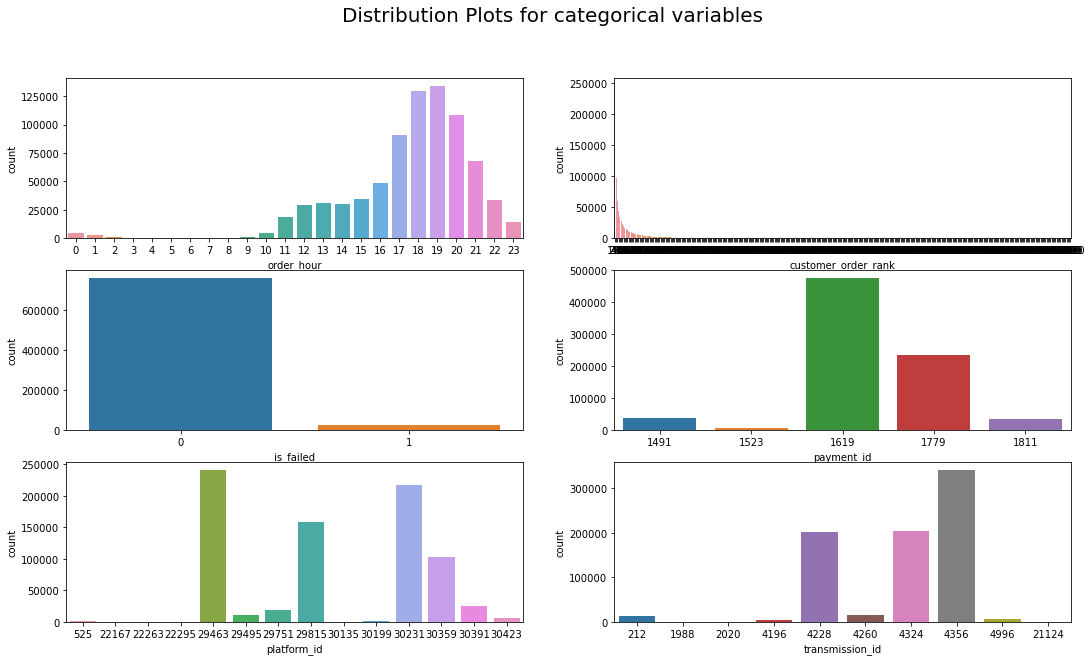

In [6]:
print("\n")
print("----------- Descriptive statistics Categorical Variables-------------")
print("\n")

order_data[['order_hour', 'customer_order_rank', 'is_failed', 'payment_id', 'platform_id', 'transmission_id']] = \
order_data[['order_hour', 'customer_order_rank', 'is_failed', 'payment_id', 'platform_id', 'transmission_id']].astype('object')
desc_Stat = order_data[['order_hour', 'customer_order_rank', 'is_failed', 'payment_id', 'platform_id', \
                        'transmission_id']].describe().T.reset_index()

desc_Stat.columns = ['Variable','Total_Records','Unique_values','Top_category','Frequency']
print(desc_Stat)


print("\n")
print("----------- Distribution of categorical variables in the dataset-------------")
print("\n")

fig, axes = plt.subplots(3, 2, figsize=(18, 10))
plt.suptitle('Distribution Plots for categorical variables',fontsize=20)

order_data_categories = order_data[['order_hour', 'customer_order_rank', 'is_failed', 'payment_id', 'platform_id',\
                                    'transmission_id']]

count=0
for i in range(0,3):
    for j in range(0,2):
        sns.countplot(ax=axes[i, j],x=order_data_categories.columns[count],data=order_data_categories)
        count = count + 1 




1. order_hour, customer_order_rank are ordinal categorical variables varying in order from 0 to 23 and 1 to 369 in ascending order whereas is_failed, payment_id platform_id, transmission_id are nominal categorival variables.


2. Distribution is skewed for all categoriocal variables among few major categories as can been seen from the plot.Thus it is a good idea to one hot encode these variables to capture significant categories specially for nominal variables

In [7]:
print("\n")
print("----------- Checking for Missing Values-------------")
print("\n")
Missing_values = pd.DataFrame(order_data.isnull().sum()).reset_index()
Missing_values.columns = ['Variable','Missing_values']
print(Missing_values)

print("\n")
print("----------- Further Investigating on Missing Values, Checking is_falied value counts-------------")
print("\n")
order_data.is_failed.value_counts()

print("\n")
print("-----------Replacing Null values for customer_order_rank with 0 for model training\
  As customer_order_rank order placed by customers in chronological order, it seems like valid imputation-------------")
print("\n")

order_data['customer_order_rank'].fillna(0, inplace = True)

Missing_values = pd.DataFrame(order_data.isnull().sum()).reset_index()
Missing_values.columns = ['Variable','Missing_values']
print(Missing_values)



----------- Checking for Missing Values-------------


               Variable  Missing_values
0           customer_id               0
1            order_date               0
2            order_hour               0
3   customer_order_rank           24767
4             is_failed               0
5        voucher_amount               0
6          delivery_fee               0
7           amount_paid               0
8         restaurant_id               0
9               city_id               0
10           payment_id               0
11          platform_id               0
12      transmission_id               0


----------- Further Investigating on Missing Values, Checking is_falied value counts-------------




-----------Replacing Null values for customer_order_rank with 0 for model training  As customer_order_rank order placed by customers in chronological order, it seems like valid imputation-------------


               Variable  Missing_values
0           customer_id             

In [8]:
print("\n")
print("----------- Checking Order_Date-------------")
print("\n")
print(order_data.sort_values('order_date').head()['order_date'])
print(order_data[order_data['order_date'] < '2015-03-01'].shape[0])

print("\n")
print("----------- removing the rows with order_date less than '2015-03-01'-------------")
print("\n")

order_data = order_data[order_data['order_date'] >= '2015-03-01']



----------- Checking Order_Date-------------


536621    2012-05-17
725423    2012-08-10
747902    2012-09-27
748165    2012-12-08
200654    2013-03-02
Name: order_date, dtype: object
53


----------- removing the rows with order_date less than '2015-03-01'-------------




We see that there are 53 rows with order date < 2015-03-01, it is given in problem that the dataset contains customers acquired between '2015-03-01' and '2017-02-28'. Thereby removing the 53 rows from modelling data

In [9]:
order_data.shape

(786547, 13)

In [10]:
print("\n")
print("----------- Saving Processed Dataset as 'Order_Data_Preprocess'-------------")
print("\n")

order_data.to_csv('data/Order_Data_Preprocess.csv')



----------- Saving Processed Dataset as 'Order_Data_Preprocess'-------------


